# Part 1: ClickStream Data

## 1.1 Load Clickstreeam

In [1]:
import pandas as pd
import numpy as np

In [2]:
click_data= pd.read_csv('data/Clickstream dataset.csv')

In [3]:
click_data

,SESSION_ID,TIMESTAMP,PAGE_NAME,BROWSER_FAMILY,BROWSER_VERSION,OS_FAMILY,DEVICE_FAMILY,DEVICE_BRAND,DEVICE_MODEL,CITY
0,1f92304e-dfc1-43df-9651-fa8b423ff494,2022-02-01 12:51:22,sign-in,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,lasalle
1,1f92304e-dfc1-43df-9651-fa8b423ff494,2022-02-01 12:51:30,home-page,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,lasalle
2,1f92304e-dfc1-43df-9651-fa8b423ff494,2022-02-01 12:51:53,account-settings,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,lasalle
3,1f92304e-dfc1-43df-9651-fa8b423ff494,2022-02-01 12:52:02,add-payment-method,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,lasalle
4,1f92304e-dfc1-43df-9651-fa8b423ff494,2022-02-01 12:52:41,checkout,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,lasalle
...,...,...,...,...,...,...,...,...,...,...
408832,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,2022-07-24 13:12:09,add-payment-method,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,montreal
408833,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,2022-07-24 13:13:43,checkout,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,montreal
408834,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,2022-07-24 13:13:51,add-shipping-address,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,montreal
408835,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,2022-07-24 13:14:31,checkout,Mobile Safari UI/WKWebView,NaN,iOS,iPhone,Apple,iPhone,montreal


## 1.2 Get visit count

In [4]:
click_df = click_data.groupby('SESSION_ID')['PAGE_NAME'].value_counts().unstack(fill_value=0)

In [5]:
click_df

PAGE_NAME,2-factor-authentication,account-settings,add-payment-method,add-shipping-address,add-to-cart,checkout,forgot-password,home-page,order-complete,order-history,payment-failed,search-results,sign-in,sign-up,update-payment-method,update-shipping-address,view-cart,view-product
SESSION_ID,,,,,,,,,,,,,,,,,,
00019a29-2653-4bef-8546-f3a406631cf1,0,0,0,0,1,3,0,1,1,1,1,1,1,0,2,0,1,5
00074eae-212b-4df4-919b-bda4cd329108,0,0,0,0,3,6,0,2,4,0,2,3,1,0,1,0,4,4
000ce105-9aab-40f2-8a07-2f3bc80566d8,0,4,4,0,11,5,0,4,3,1,0,15,1,0,0,1,6,12
001233c5-3f16-42ae-97f6-b0e4f7a72dd4,1,1,0,0,1,1,0,2,1,0,0,4,1,0,0,1,0,3
0023e766-8a43-4b74-abdb-93e36ffaaf24,1,0,1,0,6,2,0,1,1,0,0,6,1,0,0,0,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff342fd-133e-4faa-b6dd-2c95d2d0040f,0,1,0,1,5,2,0,2,2,0,0,13,1,0,0,0,2,11
fff348c3-a0c9-47bf-8f74-77fb3e903a85,1,2,0,2,4,3,0,3,2,0,0,9,1,1,0,0,3,7
fffb66e2-2390-402e-a711-b53220f3ec12,1,5,1,0,2,2,0,11,1,2,1,14,1,0,1,1,0,15


## 1.3 Get visit time

In [6]:
click_data['TIMESTAMPS'] = pd.to_datetime(click_data['TIMESTAMP']).values.astype(np.int64) // 10 ** 9
click_data['SESSION_MINUTES'] = click_data.groupby(['SESSION_ID'])['TIMESTAMPS'].transform(lambda x: (x.max()-x.min())/60)

In [7]:
print(click_data.groupby('SESSION_ID'))

In [8]:
df = click_data[["SESSION_ID","SESSION_MINUTES", "CITY","BROWSER_FAMILY","DEVICE_FAMILY", "OS_FAMILY", "BROWSER_VERSION", "DEVICE_BRAND","DEVICE_MODEL"]]

In [9]:
df

,SESSION_ID,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,1f92304e-dfc1-43df-9651-fa8b423ff494,53.216667,lasalle,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
1,1f92304e-dfc1-43df-9651-fa8b423ff494,53.216667,lasalle,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2,1f92304e-dfc1-43df-9651-fa8b423ff494,53.216667,lasalle,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
3,1f92304e-dfc1-43df-9651-fa8b423ff494,53.216667,lasalle,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
4,1f92304e-dfc1-43df-9651-fa8b423ff494,53.216667,lasalle,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
...,...,...,...,...,...,...,...,...,...
408832,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,24.450000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
408833,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,24.450000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
408834,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,24.450000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
408835,2b32e22d-30c4-49d7-afc1-27ccabe7eb01,24.450000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone


In [10]:
df.drop_duplicates(subset=df.columns.values[:-1], keep='first',inplace=True)
df.shape[0]

C:\Users\s7192288\AppData\Local\Temp\1\ipykernel_23748\1851787057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=df.columns.values[:-1], keep='first',inplace=True)


14879

## 1.4 Combine time and count

In [11]:
click_df = click_df.merge(df,on = "SESSION_ID")

In [12]:
click_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14879 entries, 0 to 14878
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SESSION_ID               14879 non-null  object 
 1   2-factor-authentication  14879 non-null  int64  
 2   account-settings         14879 non-null  int64  
 3   add-payment-method       14879 non-null  int64  
 4   add-shipping-address     14879 non-null  int64  
 5   add-to-cart              14879 non-null  int64  
 6   checkout                 14879 non-null  int64  
 7   forgot-password          14879 non-null  int64  
 8   home-page                14879 non-null  int64  
 9   order-complete           14879 non-null  int64  
 10  order-history            14879 non-null  int64  
 11  payment-failed           14879 non-null  int64  
 12  search-results           14879 non-null  int64  
 13  sign-in                  14879 non-null  int64  
 14  sign-up               

In [13]:
click_df.replace(np.nan,'NaN', inplace=True)

In [14]:
click_df

,SESSION_ID,2-factor-authentication,account-settings,add-payment-method,add-shipping-address,add-to-cart,checkout,forgot-password,home-page,order-complete,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,00019a29-2653-4bef-8546-f3a406631cf1,0,0,0,0,1,3,0,1,1,...,1,5,10.316667,north york,Android,Motorola e,Android,10,Motorola,e
1,00074eae-212b-4df4-919b-bda4cd329108,0,0,0,0,3,6,0,2,4,...,4,4,8.433333,montreal,Android,Samsung SM-A505W,Android,11,Samsung,SM-A505W
2,000ce105-9aab-40f2-8a07-2f3bc80566d8,0,4,4,0,11,5,0,4,3,...,6,12,36.316667,vancouver,Android,Samsung SM-G960W,Android,10,Samsung,SM-G960W
3,001233c5-3f16-42ae-97f6-b0e4f7a72dd4,1,1,0,0,1,1,0,2,1,...,0,3,9.083333,dieppe,Chrome,Other,Windows,106.0.0,NaN,NaN
4,0023e766-8a43-4b74-abdb-93e36ffaaf24,1,0,1,0,6,2,0,1,1,...,2,14,26.033333,vancouver,Chrome,Other,Windows,106.0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14874,fff342fd-133e-4faa-b6dd-2c95d2d0040f,0,1,0,1,5,2,0,2,2,...,2,11,24.950000,toronto,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
14875,fff348c3-a0c9-47bf-8f74-77fb3e903a85,1,2,0,2,4,3,0,3,2,...,3,7,23.783333,slave lake,Android,Generic Smartphone,Android,12,Generic,Smartphone
14876,fffb66e2-2390-402e-a711-b53220f3ec12,1,5,1,0,2,2,0,11,1,...,0,15,39.616667,toronto,Chrome,Mac,Mac OS X,106.0.0,Apple,Mac
14877,fffcf6ba-b403-4d46-8feb-92ef31467977,1,3,0,2,3,4,2,6,3,...,4,10,39.583333,dartmouth,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone


# Part 2: Transaction data

## 2.1: Dataset Loading

In [15]:
train = pd.read_csv("data/Transaction dataset - training set.csv")
test = pd.read_csv("data/Transaction dataset - testing set.csv")

In [16]:
train

,SESSION_ID,EVENT_DATETIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,...,COUNT_FASTFOOD_PAST_30DAY,COUNT_GAS_PAST_30DAY,COUNT_HIGH_AMT_PAST_30DAY,COUNT_INTERNET_PAST_30DAY,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_ELCTRNCS_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_HEALTH_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY
0,9cc2c261-b73e-4f73-94c7-cc5d78e01148,2022-03-02 15:40:49,71f8a325e,1.0,7420.73,69.70,14600.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,f3fc1ca4-5e08-42d8-bf5d-bc5026a377b5,2022-07-04 07:51:19,2b4a3e059,0.0,3825.90,1.02,7300.0,1,0,0,...,0,10,0,2,10,1,0,30,0,13
2,b8e5bcaf-1c22-4413-be36-df6f00afc622,2022-06-02 10:20:34,545cef560,0.0,115.83,33.15,1300.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40b48620-202f-429f-a890-5ad013d8817d,2022-05-28 12:00:41,6058a9fe1,0.0,28114.72,514.55,30700.0,1,0,0,...,0,1,2,9,6,0,7,30,0,8
4,2417e156-fd74-4b7d-a772-c995f8ce56ea,2022-05-21 17:12:23,3aa3e59fe,0.0,145.28,187.57,15300.0,1,0,0,...,0,0,4,0,1,3,5,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,e8533ace-cbff-401f-b704-0c527f9c2dcd,2022-03-22 12:48:03,0a0b17359,0.0,13743.60,1.02,15300.0,1,0,0,...,0,0,2,4,4,5,3,0,4,0
11899,a8375934-f424-4c79-8467-82cba952ffb1,2022-07-02 15:44:03,02e8c51fe,0.0,4544.85,4.10,6800.0,1,0,0,...,0,0,5,39,30,2,0,0,0,2
11900,f98ff29f-7222-4c16-8b44-37d9bfe452f7,2022-05-24 17:13:40,6667bd6bb,0.0,23470.20,9.22,30700.0,1,0,0,...,1,12,7,8,25,8,2,62,0,13
11901,951c4926-887e-4617-9c06-d4679ad8f9fe,2022-04-15 07:57:49,7b294c4ee,0.0,28162.90,68.25,29200.0,1,0,0,...,14,5,2,0,16,0,1,58,0,17


In [17]:
train.FRAUD_FLAG.value_counts()

FRAUD_FLAG
0.0    10985
1.0      918
Name: count, dtype: int64

## 2.2: Datetime Transformation

In [18]:
def transform_datatie(df):
    event_datetime = pd.to_datetime(df["EVENT_DATETIME"])
    df["EVENT_YEAR"] = event_datetime.dt.year
    df["EVENT_MONTH"] = event_datetime.dt.month
    df["EVENT_DAY"] = event_datetime.dt.day
    df["EVENT_HOUR"] = event_datetime.dt.hour
    df["EVENT_MINUTE"] = event_datetime.dt.minute
    df["EVENT_SECOND"] = event_datetime.dt.second
    df = df.drop(labels=["EVENT_DATETIME"],axis=1)
    return df

In [19]:
train = transform_datatie(train)
test = transform_datatie(test)

In [20]:
train["FRAUD_FLAG"] = train["FRAUD_FLAG"].astype(int)

In [21]:
train.head()

,SESSION_ID,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,...,COUNT_ELCTRNCS_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_HEALTH_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,EVENT_YEAR,EVENT_MONTH,EVENT_DAY,EVENT_HOUR,EVENT_MINUTE,EVENT_SECOND
0,9cc2c261-b73e-4f73-94c7-cc5d78e01148,71f8a325e,1,7420.73,69.70,14600.0,1,0,0,0,...,0,1,0,0,2022,3,2,15,40,49
1,f3fc1ca4-5e08-42d8-bf5d-bc5026a377b5,2b4a3e059,0,3825.90,1.02,7300.0,1,0,0,0,...,0,30,0,13,2022,7,4,7,51,19
2,b8e5bcaf-1c22-4413-be36-df6f00afc622,545cef560,0,115.83,33.15,1300.0,1,0,0,0,...,0,0,0,0,2022,6,2,10,20,34
3,40b48620-202f-429f-a890-5ad013d8817d,6058a9fe1,0,28114.72,514.55,30700.0,1,0,0,0,...,7,30,0,8,2022,5,28,12,0,41
4,2417e156-fd74-4b7d-a772-c995f8ce56ea,3aa3e59fe,0,145.28,187.57,15300.0,1,0,0,0,...,5,6,6,0,2022,5,21,17,12,23


In [22]:
test.head()

,SESSION_ID,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,...,COUNT_ELCTRNCS_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_HEALTH_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,EVENT_YEAR,EVENT_MONTH,EVENT_DAY,EVENT_HOUR,EVENT_MINUTE,EVENT_SECOND
0,2810bffa-ac9d-4dc5-9cfa-369a93e6a1f1,8b4b6f1f5,NaN,2074.60,1.02,7300.0,1,0,0,0,...,0,4,0,2,2022,4,5,15,12,58
1,cc7ad152-ebf9-4399-8d33-fe1442ae20f9,7530264ab,NaN,25250.88,0.97,29200.0,1,0,0,0,...,4,71,3,16,2022,4,19,1,22,51
2,ffda375a-09da-4b44-bc78-4aa643f621ba,41ffdb08e,NaN,20500.00,19493.45,19500.0,1,0,0,0,...,0,0,0,0,2022,2,9,0,33,29
3,77c43d5f-ea2d-4f9c-82e4-e440bfbf1ab0,349aaad0d,NaN,6206.85,12.30,7800.0,1,0,0,0,...,5,65,2,32,2022,4,15,21,52,21
4,90394d7d-c70f-4133-8a05-a3529d6e67f7,678ecd2cb,NaN,17105.20,11.28,29200.0,1,0,0,0,...,9,74,0,36,2022,3,13,21,38,45


# Part 3: Combine two dataset

## 3.1: Merge

In [23]:
full_train = train.merge(click_df, on = "SESSION_ID")
full_test = test.merge(click_df, on = "SESSION_ID")

In [24]:
full_train = full_train.drop(["SESSION_ID","TRANSACTION_ID"], axis=1)
full_test = full_test.drop(["SESSION_ID","TRANSACTION_ID"], axis=1)

In [25]:
full_train.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,1,7420.73,69.70,14600.0,1,0,0,0,0,0,...,1,1,6.550000,montreal,Mobile Safari,iPhone,iOS,16.0,Apple,iPhone
1,0,3825.90,1.02,7300.0,1,0,0,0,0,1,...,1,8,16.733333,brampton,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2,0,115.83,33.15,1300.0,1,0,0,0,0,0,...,1,7,21.050000,brampton,Edge,Other,Windows,106.0.1370,NaN,NaN
3,0,28114.72,514.55,30700.0,1,0,0,0,0,0,...,2,10,15.933333,montreal,Android,Generic Smartphone,Android,11,Generic,Smartphone
4,0,145.28,187.57,15300.0,1,0,0,0,0,1,...,2,9,19.233333,regina,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone


In [26]:
full_test.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,NaN,2074.60,1.02,7300.0,1,0,0,0,0,0,...,2,3,6.566667,oshawa,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
1,NaN,25250.88,0.97,29200.0,1,0,0,0,0,1,...,1,5,13.666667,lower sackville,Mobile Safari UI/WKWebView,iPad,iOS,NaN,Apple,iPad
2,NaN,20500.00,19493.45,19500.0,1,0,0,0,0,1,...,1,3,9.266667,vancouver,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
3,NaN,6206.85,12.30,7800.0,1,0,0,0,0,0,...,3,7,16.850000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
4,NaN,17105.20,11.28,29200.0,1,0,0,0,0,1,...,1,8,14.283333,toronto,Android,Samsung SM-A705GM,Android,10,Samsung,SM-A705GM


## 3.3: Encode categorical features

### Get catogorical columns

In [27]:
from sklearn.compose import ColumnTransformer, make_column_selector

In [28]:
categorical_features =  list(full_train.select_dtypes(include=['object']).columns)
numeric_features =  list(full_train.select_dtypes(exclude=['object']).columns)

In [29]:
numeric_features

['FRAUD_FLAG',
 'AVAIL_CRDT',
 'AMOUNT',
 'CREDIT_LIMIT',
 'CARD_NOT_PRESENT',
 'FLAG_LX',
 'FLAG_ATM',
 'FLAG_AUTO',
 'FLAG_CASH',
 'FLAG_APPAREL',
 'FLAG_DEAL',
 'FLAG_RECREA',
 'FLAG_ENTERTAINMENT',
 'FLAG_GIFT_CARD',
 'FLAG_FASTFOOD',
 'FLAG_GAS',
 'FLAG_HIGH_AMT',
 'FLAG_HIGH_RECREA',
 'FLAG_INTERNET',
 'FLAG_INTERNATIONAL',
 'FLAG_FASHION',
 'FLAG_LOW_AMT',
 'FLAG_MANUAL_ENTRY',
 'FLAG_ELCTRNCS',
 'FLAG_SWIPE',
 'FLAG_HEALTH',
 'MEAN_AUTO_PAST_7DAY',
 'MEAN_APPAREL_PAST_7DAY',
 'MEAN_RECREA_PAST_7DAY',
 'MEAN_GIFT_CARD_PAST_7DAY',
 'MEAN_FASTFOOD_PAST_7DAY',
 'MEAN_HIGH_AMT_PAST_7DAY',
 'MEAN_HIGH_RECREA_PAST_7DAY',
 'MEAN_INTERNET_PAST_7DAY',
 'MEAN_INTERNATIONAL_PAST_7DAY',
 'MEAN_FASHION_PAST_7DAY',
 'MEAN_LOW_AMT_PAST_7DAY',
 'MEAN_MANUAL_ENTRY_PAST_7DAY',
 'MEAN_ELCTRNCS_PAST_7DAY',
 'MEAN_SWIPE_PAST_7DAY',
 'MEAN_HEALTH_PAST_7DAY',
 'MEAN_WEEKEND_PAST_7DAY',
 'MAX_CASH_PAST_7DAY',
 'MAX_APPAREL_PAST_7DAY',
 'MAX_RECREA_PAST_7DAY',
 'MAX_HIGH_AMT_PAST_7DAY',
 'MAX_HIGH_RECRE

In [30]:
categorical_features

['CITY',
 'BROWSER_FAMILY',
 'DEVICE_FAMILY',
 'OS_FAMILY',
 'BROWSER_VERSION',
 'DEVICE_BRAND',
 'DEVICE_MODEL']

### Encode training data

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [32]:
encoder = OrdinalEncoder(dtype=int,handle_unknown="use_encoded_value", unknown_value=-1,encoded_missing_value=-1).set_output(transform="pandas")

In [33]:
full_train

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,1,7420.73,69.70,14600.0,1,0,0,0,0,0,...,1,1,6.550000,montreal,Mobile Safari,iPhone,iOS,16.0,Apple,iPhone
1,0,3825.90,1.02,7300.0,1,0,0,0,0,1,...,1,8,16.733333,brampton,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2,0,115.83,33.15,1300.0,1,0,0,0,0,0,...,1,7,21.050000,brampton,Edge,Other,Windows,106.0.1370,NaN,NaN
3,0,28114.72,514.55,30700.0,1,0,0,0,0,0,...,2,10,15.933333,montreal,Android,Generic Smartphone,Android,11,Generic,Smartphone
4,0,145.28,187.57,15300.0,1,0,0,0,0,1,...,2,9,19.233333,regina,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,0,13743.60,1.02,15300.0,1,0,0,0,0,1,...,4,16,33.316667,mississauga,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
11899,0,4544.85,4.10,6800.0,1,0,0,0,0,0,...,1,4,6.566667,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
11900,0,23470.20,9.22,30700.0,1,0,0,0,0,0,...,4,8,13.400000,nagpur city,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
11901,0,28162.90,68.25,29200.0,1,0,0,0,0,0,...,3,8,16.450000,brampton,Firefox,Mac,Mac OS X,106.0,Apple,Mac


In [34]:
full_train[categorical_features] = encoder.fit_transform(full_train[categorical_features])
full_train[categorical_features] = full_train[categorical_features].astype('category')

In [35]:
full_train

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,1,7420.73,69.70,14600.0,1,0,0,0,0,0,...,1,1,6.550000,521,12,353,7,48,1,353
1,0,3825.90,1.02,7300.0,1,0,0,0,0,1,...,1,8,16.733333,104,13,353,7,93,1,353
2,0,115.83,33.15,1300.0,1,0,0,0,0,0,...,1,7,21.050000,104,7,111,6,22,11,75
3,0,28114.72,514.55,30700.0,1,0,0,0,0,0,...,2,10,15.933333,521,1,21,0,26,3,325
4,0,145.28,187.57,15300.0,1,0,0,0,0,1,...,2,9,19.233333,653,13,353,7,93,1,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,0,13743.60,1.02,15300.0,1,0,0,0,0,1,...,4,16,33.316667,512,13,353,7,93,1,353
11899,0,4544.85,4.10,6800.0,1,0,0,0,0,0,...,1,4,6.566667,521,13,353,7,93,1,353
11900,0,23470.20,9.22,30700.0,1,0,0,0,0,0,...,4,8,13.400000,538,13,353,7,93,1,353
11901,0,28162.90,68.25,29200.0,1,0,0,0,0,0,...,3,8,16.450000,104,9,44,4,20,1,72


In [36]:
# column_trans = make_column_transformer(
#     (OrdinalEncoder(dtype=int,handle_unknown="use_encoded_value", unknown_value=-1,encoded_missing_value=-1).set_output(transform="pandas"),categorical_features),
#           # ('StandardScaler', StandardScaler(), numeric_features)
#     remainder="passthrough",
#     verbose_feature_names_out=False
#     )
# column_trans

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(full_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Columns: 175 entries, FRAUD_FLAG to DEVICE_MODEL
dtypes: category(7), float64(98), int32(7), int64(63)
memory usage: 15.1 MB
None


In [38]:
full_train.describe()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,order-history,payment-failed,search-results,sign-in,sign-up,update-payment-method,update-shipping-address,view-cart,view-product,SESSION_MINUTES
count,11903.000000,11903.000000,11903.00000,11903.000000,11903.0,11903.000000,11903.0,11903.000000,11903.0,11903.000000,...,11903.000000,11903.000000,11903.000000,11903.00000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000
mean,0.077123,10738.709387,133.74558,15554.498866,1.0,0.063513,0.0,0.005293,0.0,0.262539,...,0.624884,0.216752,5.080820,1.22969,0.201378,0.265479,0.210283,1.726119,7.127699,17.138324
std,0.266798,8751.465990,574.27704,9937.916662,0.0,0.243894,0.0,0.072562,0.0,0.440032,...,0.838501,0.547122,4.024837,0.59883,0.405836,0.644971,0.492820,1.343316,6.108496,11.373788
min,0.000000,0.000000,0.97000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816667
25%,0.000000,2510.910000,9.75000,7100.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,1.000000,3.000000,8.566667
50%,0.000000,9719.770000,36.90000,15600.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,4.000000,1.00000,0.000000,0.000000,0.000000,1.000000,5.000000,14.300000
75%,0.000000,16966.315000,100.00000,21500.000000,1.0,0.000000,0.0,0.000000,0.0,1.000000,...,1.000000,0.000000,7.000000,1.00000,0.000000,0.000000,0.000000,2.000000,10.000000,23.000000
max,1.000000,67723.800000,40126.70000,88100.000000,1.0,1.000000,0.0,1.000000,0.0,1.000000,...,6.000000,8.000000,15.000000,6.00000,2.000000,8.000000,5.000000,13.000000,30.000000,65.633333


### Encoding test data

In [39]:
full_test

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,NaN,2074.60,1.02,7300.0,1,0,0,0,0,0,...,2,3,6.566667,oshawa,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
1,NaN,25250.88,0.97,29200.0,1,0,0,0,0,1,...,1,5,13.666667,lower sackville,Mobile Safari UI/WKWebView,iPad,iOS,NaN,Apple,iPad
2,NaN,20500.00,19493.45,19500.0,1,0,0,0,0,1,...,1,3,9.266667,vancouver,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
3,NaN,6206.85,12.30,7800.0,1,0,0,0,0,0,...,3,7,16.850000,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
4,NaN,17105.20,11.28,29200.0,1,0,0,0,0,1,...,1,8,14.283333,toronto,Android,Samsung SM-A705GM,Android,10,Samsung,SM-A705GM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,NaN,371.05,6.15,10200.0,1,0,0,0,0,0,...,0,3,14.216667,lancaster,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2972,NaN,13680.67,45.83,19500.0,1,0,0,0,0,0,...,2,3,8.566667,winnipeg,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2973,NaN,14791.77,33.83,18400.0,1,0,0,0,0,1,...,1,3,14.633333,st. john's,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone
2974,NaN,8000.12,9.75,9700.0,1,0,0,0,0,0,...,2,7,21.183333,montreal,Mobile Safari UI/WKWebView,iPhone,iOS,NaN,Apple,iPhone


In [40]:
full_test[categorical_features] = encoder.transform(full_test[categorical_features])
full_test[categorical_features] = full_test[categorical_features].astype('category')

In [41]:
full_test

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,NaN,2074.60,1.02,7300.0,1,0,0,0,0,0,...,2,3,6.566667,579,13,353,7,93,1,353
1,NaN,25250.88,0.97,29200.0,1,0,0,0,0,1,...,1,5,13.666667,462,13,352,7,93,1,352
2,NaN,20500.00,19493.45,19500.0,1,0,0,0,0,1,...,1,3,9.266667,851,13,353,7,93,1,353
3,NaN,6206.85,12.30,7800.0,1,0,0,0,0,0,...,3,7,16.850000,521,13,353,7,93,1,353
4,NaN,17105.20,11.28,29200.0,1,0,0,0,0,1,...,1,8,14.283333,829,1,200,0,0,15,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,NaN,371.05,6.15,10200.0,1,0,0,0,0,0,...,0,3,14.216667,429,13,353,7,93,1,353
2972,NaN,13680.67,45.83,19500.0,1,0,0,0,0,0,...,2,3,8.566667,901,13,353,7,93,1,353
2973,NaN,14791.77,33.83,18400.0,1,0,0,0,0,1,...,1,3,14.633333,774,13,353,7,93,1,353
2974,NaN,8000.12,9.75,9700.0,1,0,0,0,0,0,...,2,7,21.183333,521,13,353,7,93,1,353


In [42]:
full_train.to_pickle("full_train")

In [43]:
full_test.to_pickle("full_test")

## 3.2: Split to X and y

In [44]:
X = full_train.drop(["FRAUD_FLAG"], axis=1)
y = full_train["FRAUD_FLAG"]

In [45]:
X_test = full_test.drop(["FRAUD_FLAG"], axis=1)

In [46]:
X.shape, X_test.shape

((11903, 174), (2976, 174))

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(X.iloc[0])

AVAIL_CRDT                        7420.73
AMOUNT                              69.70
CREDIT_LIMIT                     14600.00
CARD_NOT_PRESENT                     1.00
FLAG_LX                              0.00
FLAG_ATM                             0.00
FLAG_AUTO                            0.00
FLAG_CASH                            0.00
FLAG_APPAREL                         0.00
FLAG_DEAL                            0.00
FLAG_RECREA                          0.00
FLAG_ENTERTAINMENT                   0.00
FLAG_GIFT_CARD                       0.00
FLAG_FASTFOOD                        0.00
FLAG_GAS                             0.00
FLAG_HIGH_AMT                        0.00
FLAG_HIGH_RECREA                     0.00
FLAG_INTERNET                        1.00
FLAG_INTERNATIONAL                   0.00
FLAG_FASHION                         0.00
FLAG_LOW_AMT                         0.00
FLAG_MANUAL_ENTRY                    0.00
FLAG_ELCTRNCS                        0.00
FLAG_SWIPE                        

# Part 4: Model Training

## 4.1: setup cross validation

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [157]:
seed = 42

In [158]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

## 4.2: Model instiation

### Separate

In [173]:
lgbm_fit_params = {
     'categorical_feature' : categorical_features,
}

In [174]:
from lightgbm import LGBMClassifier
param = {
    'boosting_type' : 'gbdt',
    'max_depth' : 20,
    'learning_rate' : 0.1,
    'n_estimators' : 400,
    'random_state' : seed,
    'class_weight' : {0:0.1, 1:1},  
    'categorical_feature' : categorical_features,
}
lgbm = LGBMClassifier(**param)
lgbm

LGBMClassifier(categorical_feature=['CITY', 'BROWSER_FAMILY', 'DEVICE_FAMILY',
                                    'OS_FAMILY', 'BROWSER_VERSION',
                                    'DEVICE_BRAND', 'DEVICE_MODEL'],
               class_weight={0: 0.1, 1: 1}, max_depth=20, n_estimators=400,
               random_state=42)

In [175]:
from sklearn.ensemble import HistGradientBoostingClassifier
param = {
    'max_depth' : 20,
    'learning_rate' : 0.1,
    'max_iter' : 500,
    'l2_regularization' : 1,
    'random_state' : seed,
    'class_weight' : {0: 0.1, 1: 1},
    # 'categorical_features' : categorical_features,
}
hgb = HistGradientBoostingClassifier(**param)
hgb

HistGradientBoostingClassifier(class_weight={0: 0.1, 1: 1}, l2_regularization=1,
                               max_depth=20, max_iter=500, random_state=42)

In [176]:
from catboost import CatBoostClassifier
param = {
    'iterations' : 500,
    'max_depth' : None,
    'learning_rate' : 0.1,
    'random_state' : seed,
    'class_weights' : {0:0.1, 1:1},
    'cat_features' : categorical_features
}
cb = CatBoostClassifier(**param)
cb

### Ensemble: Mean of proba

In [177]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [178]:
eclf_soft = VotingClassifier(
    estimators=[('LGBMClassifier', lgbm), ('HistGradientBoostingClassifier', hgb), ('CatBoostClassifier', cb)], #
    voting='soft')
eclf_soft

VotingClassifier(estimators=[('LGBMClassifier',
                              LGBMClassifier(categorical_feature=['CITY',
                                                                  'BROWSER_FAMILY',
                                                                  'DEVICE_FAMILY',
                                                                  'OS_FAMILY',
                                                                  'BROWSER_VERSION',
                                                                  'DEVICE_BRAND',
                                                                  'DEVICE_MODEL'],
                                             class_weight={0: 0.1, 1: 1},
                                             max_depth=20, n_estimators=400,
                                             random_state=42)),
                             ('HistGradientBoostingClassifier',
                              HistGradientBoostingClassifier(class_weight={0: 0.1,
                                                                           1: 1},
                                                             l2_regularization=1,
                                                             max_depth=20,
                                                             max_iter=500,
                                                             random_state=42)),
                             ('CatBoostClassifier',
                              <catboost.core.CatBoostClassifier object at 0x000002928C9D8880>)],
                 voting='soft')

## 4.3 Train and Validate

In [165]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Separate

In [67]:
scores = cross_validate(lgbm, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          5.929427
score_time        0.237383
test_precision    0.867293
test_recall       0.738531
test_f1           0.797600
test_roc_auc      0.976572
dtype: float64

In [68]:
scores = cross_validate(hgb, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          30.493681
score_time         0.391740
test_precision     0.798287
test_recall        0.759201
test_f1            0.777573
test_roc_auc       0.970317
dtype: float64

In [69]:
scores = cross_validate(cb, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          63.373787
score_time         0.064594
test_precision     0.801356
test_recall        0.803890
test_f1            0.802090
test_roc_auc       0.977468
dtype: float64

### Ensemble: Mean of proba

In [179]:
scores = cross_validate(eclf_soft, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          109.490708
score_time          0.773494
test_precision      0.849739
test_recall         0.777726
test_f1             0.811626
test_roc_auc        0.977472
dtype: float64

# Part 6: Feature Importance within training data

In [101]:
X.shape, X_test.shape

((11903, 174), (2976, 174))

In [80]:
import matplotlib.pyplot as plt

In [93]:
from sklearn.inspection import permutation_importance

In [96]:
def plot(feature_importances):
    sorted_idx = np.argsort(feature_importances)[::-1][:30][::-1]
    fig = plt.figure(figsize=(12,6))
    plt.barh(range(len(sorted_idx)),feature_importances[sorted_idx],align='center')
    plt.yticks(range(len(sorted_idx)),np.array(X.columns)[sorted_idx])

### LightGBM

In [71]:
lgbm.fit(X,y)

C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMClassifier(categorical_feature=['CITY', 'BROWSER_FAMILY', 'DEVICE_FAMILY',
                                    'OS_FAMILY', 'BROWSER_VERSION',
                                    'DEVICE_BRAND', 'DEVICE_MODEL'],
               class_weight={0: 0.1, 1: 1}, max_depth=20, n_estimators=400,
               random_state=42)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

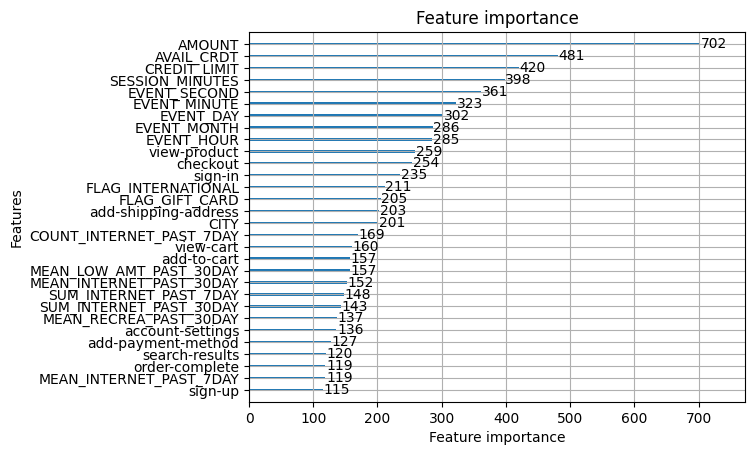

In [75]:
import lightgbm
lightgbm.plot_importance(lgbm,max_num_features=30)

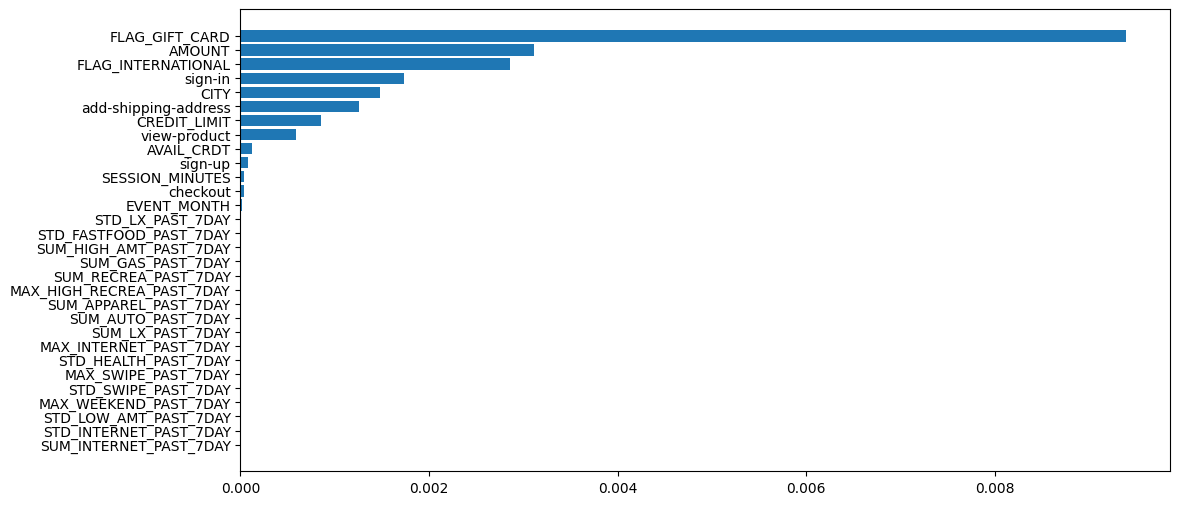

In [104]:
result_lgbm = permutation_importance(lgbm, X, y, n_repeats=5,random_state=seed, n_jobs=8)
plot(result_lgbm.importances_mean)

### HistGboost

In [91]:
hgb.fit(X,y)

HistGradientBoostingClassifier(class_weight={0: 0.1, 1: 1}, l2_regularization=1,
                               max_depth=20, max_iter=500, random_state=42)

In [95]:
result = permutation_importance(hgb, X, y, n_repeats=5,random_state=seed, n_jobs=8)

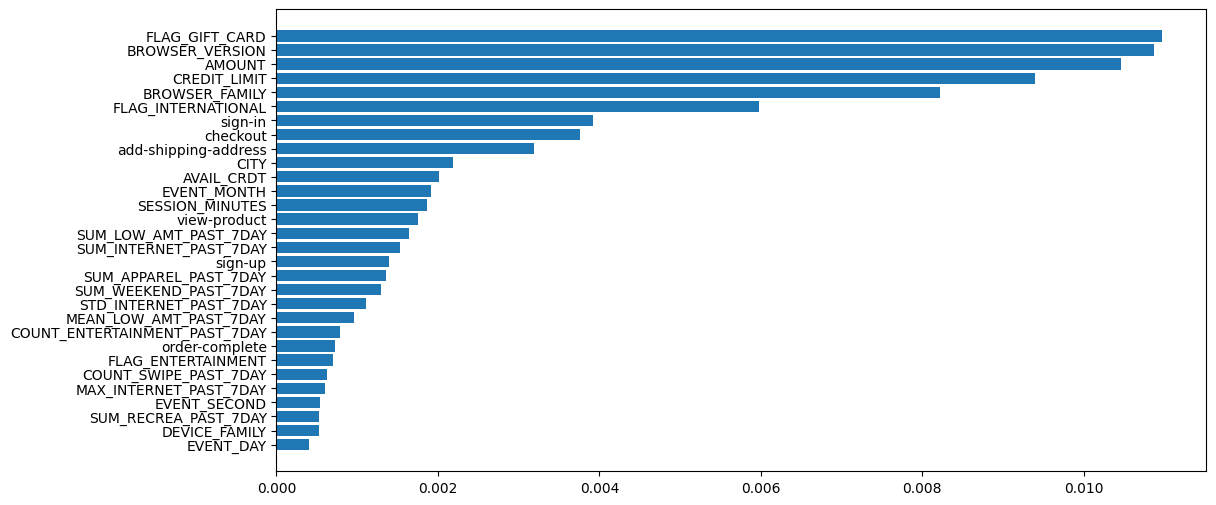

In [99]:
plot(result.importances_mean)

### CatBoost

In [78]:
cb.fit(X,y)

0:	learn: 0.6136315	total: 235ms	remaining: 1m 57s
1:	learn: 0.5504612	total: 324ms	remaining: 1m 20s
2:	learn: 0.5011732	total: 438ms	remaining: 1m 12s
3:	learn: 0.4660073	total: 532ms	remaining: 1m 5s
4:	learn: 0.4379301	total: 628ms	remaining: 1m 2s
5:	learn: 0.4131794	total: 721ms	remaining: 59.3s
6:	learn: 0.3898230	total: 811ms	remaining: 57.1s
7:	learn: 0.3732772	total: 891ms	remaining: 54.8s
8:	learn: 0.3577419	total: 992ms	remaining: 54.1s
9:	learn: 0.3445418	total: 1.08s	remaining: 53s
10:	learn: 0.3302371	total: 1.18s	remaining: 52.6s
11:	learn: 0.3180433	total: 1.27s	remaining: 51.8s
12:	learn: 0.3061694	total: 1.36s	remaining: 50.9s
13:	learn: 0.2963163	total: 1.46s	remaining: 50.7s
14:	learn: 0.2890134	total: 1.58s	remaining: 51.2s
15:	learn: 0.2808539	total: 1.68s	remaining: 50.8s
16:	learn: 0.2729732	total: 1.76s	remaining: 50s
17:	learn: 0.2669839	total: 1.83s	remaining: 49s
18:	learn: 0.2615493	total: 1.93s	remaining: 48.7s
19:	learn: 0.2570025	total: 2.02s	remaining:

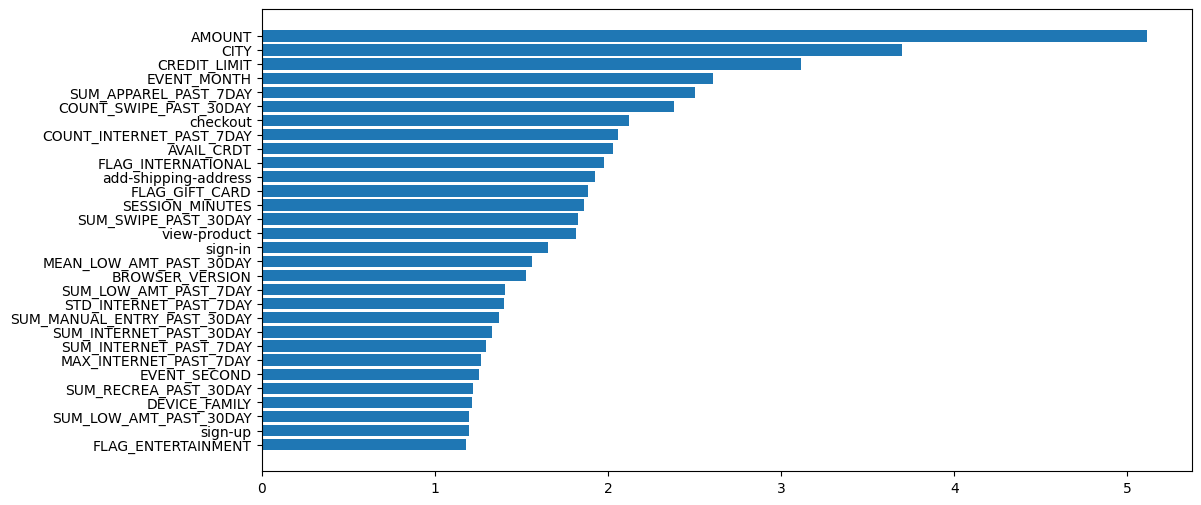

In [97]:
plot(cb.feature_importances_)

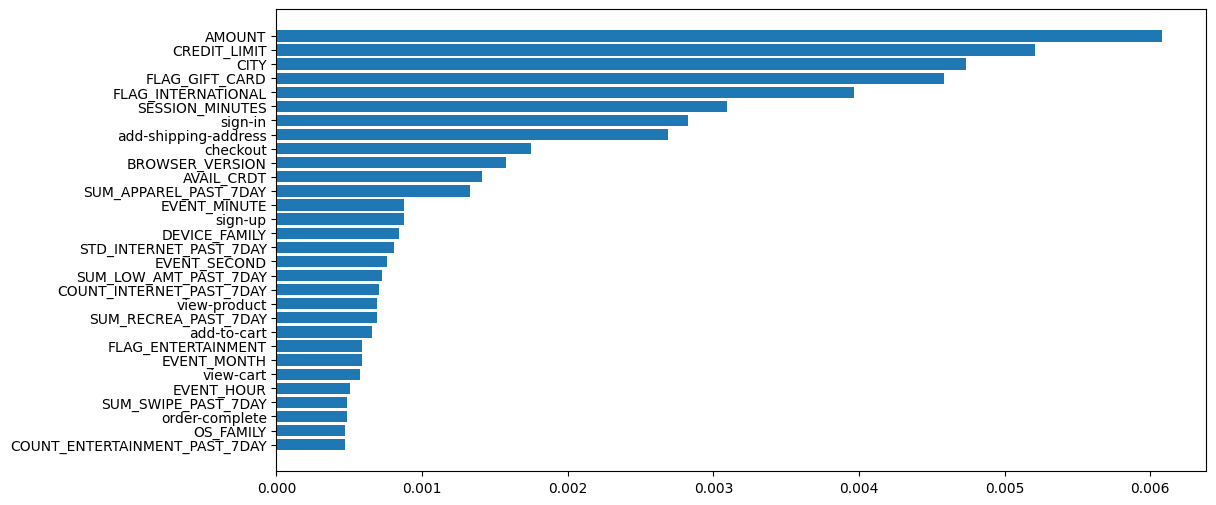

In [105]:
result_cb = permutation_importance(cb, X, y, n_repeats=5,random_state=seed, n_jobs=8)
plot(result_cb.importances_mean)

### Ensemble

In [106]:
eclf_soft.fit(X,y)

C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


0:	learn: 0.6136315	total: 196ms	remaining: 1m 37s
1:	learn: 0.5504612	total: 383ms	remaining: 1m 35s
2:	learn: 0.5011732	total: 596ms	remaining: 1m 38s
3:	learn: 0.4660073	total: 789ms	remaining: 1m 37s
4:	learn: 0.4379301	total: 1.02s	remaining: 1m 41s
5:	learn: 0.4131794	total: 1.24s	remaining: 1m 41s
6:	learn: 0.3898230	total: 1.42s	remaining: 1m 40s
7:	learn: 0.3732772	total: 1.67s	remaining: 1m 42s
8:	learn: 0.3577419	total: 1.87s	remaining: 1m 42s
9:	learn: 0.3445418	total: 2.03s	remaining: 1m 39s
10:	learn: 0.3302371	total: 2.23s	remaining: 1m 39s
11:	learn: 0.3180433	total: 2.44s	remaining: 1m 39s
12:	learn: 0.3061694	total: 2.64s	remaining: 1m 38s
13:	learn: 0.2963163	total: 2.82s	remaining: 1m 38s
14:	learn: 0.2890134	total: 3s	remaining: 1m 36s
15:	learn: 0.2808539	total: 3.19s	remaining: 1m 36s
16:	learn: 0.2729732	total: 3.4s	remaining: 1m 36s
17:	learn: 0.2669839	total: 3.57s	remaining: 1m 35s
18:	learn: 0.2615493	total: 3.77s	remaining: 1m 35s
19:	learn: 0.2570025	total

VotingClassifier(estimators=[('LGBMClassifier',
                              LGBMClassifier(categorical_feature=['CITY',
                                                                  'BROWSER_FAMILY',
                                                                  'DEVICE_FAMILY',
                                                                  'OS_FAMILY',
                                                                  'BROWSER_VERSION',
                                                                  'DEVICE_BRAND',
                                                                  'DEVICE_MODEL'],
                                             class_weight={0: 0.1, 1: 1},
                                             max_depth=20, n_estimators=400,
                                             random_state=42)),
                             ('HistGradientBoostingClassifier',
                              HistGradientBoostingClassifier(class_weight={0: 0.1,
                                                                           1: 1},
                                                             l2_regularization=1,
                                                             max_depth=20,
                                                             max_iter=500,
                                                             random_state=42)),
                             ('CatBoostClassifier',
                              <catboost.core.CatBoostClassifier object at 0x0000029282035A90>)],
                 voting='soft')

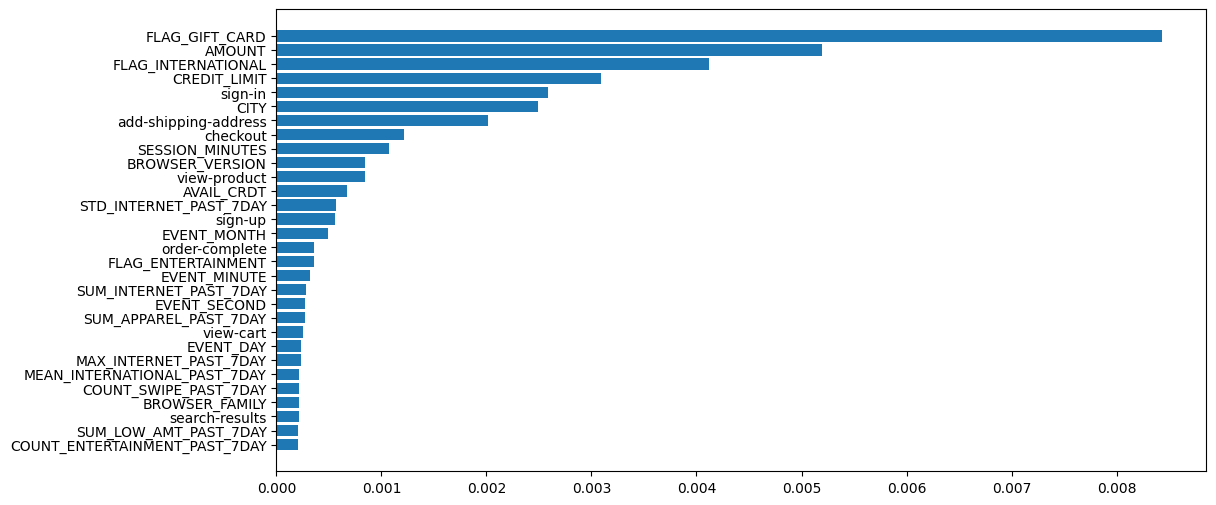

In [107]:
result_eclf_soft = permutation_importance(eclf_soft, X, y, n_repeats=5,random_state=seed, n_jobs=8)
plot(result_eclf_soft.importances_mean)

# Part 7: Predict

In [108]:
best_model = eclf_soft

In [109]:
scores = cross_validate(best_model, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          131.502356
score_time          1.066344
test_precision      0.849739
test_recall         0.777726
test_f1             0.811626
test_roc_auc        0.977472
dtype: float64

Validate test data

In [110]:
test

,SESSION_ID,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,...,COUNT_ELCTRNCS_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_HEALTH_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,EVENT_YEAR,EVENT_MONTH,EVENT_DAY,EVENT_HOUR,EVENT_MINUTE,EVENT_SECOND
0,2810bffa-ac9d-4dc5-9cfa-369a93e6a1f1,8b4b6f1f5,NaN,2074.60,1.02,7300.0,1,0,0,0,...,0,4,0,2,2022,4,5,15,12,58
1,cc7ad152-ebf9-4399-8d33-fe1442ae20f9,7530264ab,NaN,25250.88,0.97,29200.0,1,0,0,0,...,4,71,3,16,2022,4,19,1,22,51
2,ffda375a-09da-4b44-bc78-4aa643f621ba,41ffdb08e,NaN,20500.00,19493.45,19500.0,1,0,0,0,...,0,0,0,0,2022,2,9,0,33,29
3,77c43d5f-ea2d-4f9c-82e4-e440bfbf1ab0,349aaad0d,NaN,6206.85,12.30,7800.0,1,0,0,0,...,5,65,2,32,2022,4,15,21,52,21
4,90394d7d-c70f-4133-8a05-a3529d6e67f7,678ecd2cb,NaN,17105.20,11.28,29200.0,1,0,0,0,...,9,74,0,36,2022,3,13,21,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,16c29ac5-0e1f-420f-8122-be28507ac2eb,7de992096,NaN,371.05,6.15,10200.0,1,0,0,0,...,6,0,0,0,2022,6,25,16,37,48
2972,b3e1dfbb-c94c-477a-931e-74158ecbb4f2,2d9f2c2de,NaN,13680.67,45.83,19500.0,1,0,0,0,...,9,64,2,20,2022,4,8,16,15,16
2973,4b04e14a-d558-48e7-b472-ef7e74bc3c25,5cfc0cd0b,NaN,14791.77,33.83,18400.0,1,0,0,0,...,3,48,2,31,2022,3,29,14,8,35
2974,f6f4629d-ddde-4a2e-bb8a-4d521710adc8,390fa6f61,NaN,8000.12,9.75,9700.0,1,0,0,0,...,0,13,0,26,2022,7,11,21,50,22


In [111]:
X_test

,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,FLAG_DEAL,...,view-cart,view-product,SESSION_MINUTES,CITY,BROWSER_FAMILY,DEVICE_FAMILY,OS_FAMILY,BROWSER_VERSION,DEVICE_BRAND,DEVICE_MODEL
0,2074.60,1.02,7300.0,1,0,0,0,0,0,0,...,2,3,6.566667,579,13,353,7,93,1,353
1,25250.88,0.97,29200.0,1,0,0,0,0,1,0,...,1,5,13.666667,462,13,352,7,93,1,352
2,20500.00,19493.45,19500.0,1,0,0,0,0,1,0,...,1,3,9.266667,851,13,353,7,93,1,353
3,6206.85,12.30,7800.0,1,0,0,0,0,0,0,...,3,7,16.850000,521,13,353,7,93,1,353
4,17105.20,11.28,29200.0,1,0,0,0,0,1,0,...,1,8,14.283333,829,1,200,0,0,15,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,371.05,6.15,10200.0,1,0,0,0,0,0,0,...,0,3,14.216667,429,13,353,7,93,1,353
2972,13680.67,45.83,19500.0,1,0,0,0,0,0,0,...,2,3,8.566667,901,13,353,7,93,1,353
2973,14791.77,33.83,18400.0,1,0,0,0,0,1,0,...,1,3,14.633333,774,13,353,7,93,1,353
2974,8000.12,9.75,9700.0,1,0,0,0,0,0,0,...,2,7,21.183333,521,13,353,7,93,1,353


In [116]:
np.all(test['AMOUNT'] == X_test['AMOUNT'])

True

In [117]:
TRANSACTION_ID = test['TRANSACTION_ID']

Fit and predict

In [112]:
best_model.fit(X,y)

C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\s7192288\PycharmProjects\pythonProject\venv\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


0:	learn: 0.6136315	total: 86.3ms	remaining: 43.1s
1:	learn: 0.5504612	total: 190ms	remaining: 47.2s
2:	learn: 0.5011732	total: 305ms	remaining: 50.5s
3:	learn: 0.4660073	total: 386ms	remaining: 47.9s
4:	learn: 0.4379301	total: 474ms	remaining: 47s
5:	learn: 0.4131794	total: 571ms	remaining: 47s
6:	learn: 0.3898230	total: 671ms	remaining: 47.3s
7:	learn: 0.3732772	total: 763ms	remaining: 46.9s
8:	learn: 0.3577419	total: 861ms	remaining: 47s
9:	learn: 0.3445418	total: 941ms	remaining: 46.1s
10:	learn: 0.3302371	total: 1.04s	remaining: 46.1s
11:	learn: 0.3180433	total: 1.12s	remaining: 45.5s
12:	learn: 0.3061694	total: 1.2s	remaining: 45.1s
13:	learn: 0.2963163	total: 1.3s	remaining: 45.2s
14:	learn: 0.2890134	total: 1.41s	remaining: 45.4s
15:	learn: 0.2808539	total: 1.49s	remaining: 45.1s
16:	learn: 0.2729732	total: 1.59s	remaining: 45.3s
17:	learn: 0.2669839	total: 1.68s	remaining: 44.9s
18:	learn: 0.2615493	total: 1.78s	remaining: 45s
19:	learn: 0.2570025	total: 1.86s	remaining: 44.7s

VotingClassifier(estimators=[('LGBMClassifier',
                              LGBMClassifier(categorical_feature=['CITY',
                                                                  'BROWSER_FAMILY',
                                                                  'DEVICE_FAMILY',
                                                                  'OS_FAMILY',
                                                                  'BROWSER_VERSION',
                                                                  'DEVICE_BRAND',
                                                                  'DEVICE_MODEL'],
                                             class_weight={0: 0.1, 1: 1},
                                             max_depth=20, n_estimators=400,
                                             random_state=42)),
                             ('HistGradientBoostingClassifier',
                              HistGradientBoostingClassifier(class_weight={0: 0.1,
                                                                           1: 1},
                                                             l2_regularization=1,
                                                             max_depth=20,
                                                             max_iter=500,
                                                             random_state=42)),
                             ('CatBoostClassifier',
                              <catboost.core.CatBoostClassifier object at 0x0000029282035A90>)],
                 voting='soft')

In [122]:
prob = best_model.predict_proba(X_test)[:,1]

In [123]:
target = best_model.predict(X_test)

In [124]:
result_raw = {
    'TRANSACTION_ID': TRANSACTION_ID, 
    'PREDICTION' : target, 
    'PROBABILITY' : prob
}

In [125]:
result = pd.DataFrame(result_raw)
result

,TRANSACTION_ID,PREDICTION,PROBABILITY
0,8b4b6f1f5,0,0.001730
1,7530264ab,0,0.003167
2,41ffdb08e,0,0.193074
3,349aaad0d,0,0.002570
4,678ecd2cb,0,0.005813
...,...,...,...
2971,7de992096,0,0.009736
2972,2d9f2c2de,0,0.001097
2973,5cfc0cd0b,0,0.001506
2974,390fa6f61,0,0.231134


All correct

In [127]:
result[result['PROBABILITY']>=0.5].PREDICTION.value_counts()

PREDICTION
1    223
Name: count, dtype: int64

In [128]:
result[result['PROBABILITY']<0.5].PREDICTION.value_counts()

PREDICTION
0    2753
Name: count, dtype: int64

In [130]:
result.to_csv("team_71_prediction.csv")

In [131]:
import pickle

In [134]:
with open('best_model','wb') as f:
    pickle.dump(best_model,f)

# Part 8: Threshold for decline

In [170]:
from sklearn.model_selection import cross_val_predict
from copy import deepcopy
from sklearn.metrics import classification_report, precision_score, recall_score

In [139]:
best_model_threshold = deepcopy(best_model)

In [145]:
val_proba = cross_val_predict(best_model_threshold, X, y, cv=skf, n_jobs=8, method="predict_proba")

In [172]:
for threshold in np.arange(0,1,0.1).tolist():
    label = val_proba[:,1]>=threshold
    print(f" Threshold {threshold: .2f} Precision {precision_score(y, label): .4f} Recall  {recall_score(y, label): .4f}")

 Threshold  0.00 Precision  0.0771 Recall   1.0000
 Threshold  0.10 Precision  0.6197 Recall   0.9052
 Threshold  0.20 Precision  0.7193 Recall   0.8682
 Threshold  0.30 Precision  0.7726 Recall   0.8366
 Threshold  0.40 Precision  0.8196 Recall   0.8115
 Threshold  0.50 Precision  0.8490 Recall   0.7778
 Threshold  0.60 Precision  0.8863 Recall   0.7386
 Threshold  0.70 Precision  0.9124 Recall   0.7037
 Threshold  0.80 Precision  0.9247 Recall   0.6558
 Threshold  0.90 Precision  0.9493 Recall   0.5915


# Appendix: SMOTE

## 5.1: Model instiation (without weighting)

### Separate

In [569]:
from lightgbm import LGBMClassifier
param = {
    'boosting_type' : 'gbdt',
    'max_depth' : 20,
    'learning_rate' : 0.1,
    'n_estimators' : 400,
    'random_state' : seed,
    'class_weight' : None,  
    'categorical_feature' : categorical_features,
}
lgbm = LGBMClassifier(**param)
lgbm

LGBMClassifier(categorical_feature=['CITY', 'BROWSER_FAMILY', 'DEVICE_FAMILY',
                                    'OS_FAMILY', 'BROWSER_VERSION',
                                    'DEVICE_BRAND', 'DEVICE_MODEL'],
               max_depth=20, n_estimators=400, random_state=42)

In [570]:
from sklearn.ensemble import HistGradientBoostingClassifier
param = {
    'max_depth' : 20,
    'learning_rate' : 0.1,
    'max_iter' : 500,
    'l2_regularization' : 1,
    'random_state' : seed,
    'class_weight' : None,
    # 'categorical_features' : categorical_features,
}
hgb = HistGradientBoostingClassifier(**param)
hgb

HistGradientBoostingClassifier(l2_regularization=1, max_depth=20, max_iter=500,
                               random_state=42)

In [571]:
from catboost import CatBoostClassifier
param = {
    'iterations' : 500,
    'max_depth' : None,
    'learning_rate' : 0.1,
    'random_state' : seed,
    'class_weights' : None,
    'cat_features' : categorical_features
}
cb = CatBoostClassifier(**param)
cb

### Ensemble: Mean of proba

In [572]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [574]:
eclf_soft = VotingClassifier(
    estimators=[('LGBMClassifier', lgbm), ('HistGradientBoostingClassifier', hgb), ('CatBoostClassifier', cb)], #
    voting='soft')
eclf_soft

VotingClassifier(estimators=[('LGBMClassifier',
                              LGBMClassifier(categorical_feature=['CITY',
                                                                  'BROWSER_FAMILY',
                                                                  'DEVICE_FAMILY',
                                                                  'OS_FAMILY',
                                                                  'BROWSER_VERSION',
                                                                  'DEVICE_BRAND',
                                                                  'DEVICE_MODEL'],
                                             max_depth=20, n_estimators=400,
                                             random_state=42)),
                             ('HistGradientBoostingClassifier',
                              HistGradientBoostingClassifier(l2_regularization=1,
                                                             max_depth=20,
                                                             max_iter=500,
                                                             random_state=42)),
                             ('CatBoostClassifier',
                              <catboost.core.CatBoostClassifier object at 0x000002CC01863CA0>)],
                 voting='soft')

## 5.2: Adding SMOTENC 

In [592]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

In [576]:
categorical_features_index = X.columns.get_indexer(categorical_features) 
categorical_features_index

array([167, 168, 169, 170, 171, 172, 173], dtype=int64)

In [577]:
list(X.columns[categorical_features_index]) == categorical_features

True

In [579]:
eclf_soft_over_steps = [('over', SMOTENC(random_state=seed, categorical_features=categorical_features_index)), ('model', eclf_soft)]
eclf_soft_over = Pipeline(steps=eclf_soft_over_steps)

## 5.3: Train and Validate (SMOTENC)

In [581]:
scores = cross_validate(eclf_soft_over, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          275.676501
score_time          1.152279
test_precision      0.803142
test_recall         0.723278
test_f1             0.760766
test_roc_auc        0.969746
dtype: float64

## 5.4: Adding SMOTENC & downsampling

In [601]:
eclf_soft_over_steps = [
    ('over', SMOTENC(random_state=seed, categorical_features=categorical_features_index, sampling_strategy=0.25)), 
    ('under', EditedNearestNeighbours()),#RandomUnderSampler(sampling_strategy=0.5)),
    ('model', eclf_soft)]
eclf_soft_over_under = Pipeline(steps=eclf_soft_over_steps)

## 5.5: Train and Validate (SMOTENC & downsampling)

Random undersample

In [590]:
scores = cross_validate(eclf_soft_over_under, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          198.029238
score_time          1.663759
test_precision      0.751913
test_recall         0.788637
test_f1             0.769754
test_roc_auc        0.973469
dtype: float64

ENN

In [603]:
scores = cross_validate(eclf_soft_over_under, X, y, cv=skf, scoring = ('precision','recall','f1','roc_auc'), n_jobs=8)
pd.DataFrame(scores).mean()

fit_time          211.185338
score_time          1.576578
test_precision      0.709897
test_recall         0.788632
test_f1             0.747028
test_roc_auc        0.971420
dtype: float64

next: try more neighbours